In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import re
from datetime import datetime
#elbow method
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("data.csv", encoding= 'unicode_escape')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
df.shape[0]

541909

### Handling of Missing Values

In [4]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values'}))
df_info = df_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index={0:"Null Value %"}))
df_info

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice  \
column type     object    object      object    int64      object   float64   
Null Values          0         0        1454        0           0         0   
Null Value %       0.0       0.0    0.268311      0.0         0.0       0.0   

             CustomerID Country  
column type     float64  object  
Null Values      135080       0  
Null Value %  24.926694     0.0

Observation:
    Column "Description" and "CustomerID" has null values in it.
    "Description" = 0.26%
    "CustomerID" = 24.92 %
    
Conclusion:

1) I am Dropping 0.26% "Description" values.

2) I am Dropping 24.92% of "CustomerID" bcoz its impossible to fill them using any statistical method.

    

In [5]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [51]:
df.dropna(subset=['Description', "CustomerID"], inplace=True)

In [52]:
df.reset_index(inplace=True)

In [53]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values'}))
df_info = df_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index={0:"Null Value %"}))
df_info

index InvoiceNo StockCode Description Quantity InvoiceDate  \
column type   int64    object    object      object    int64      object   
Null Values       0         0         0           0        0           0   
Null Value %    0.0       0.0       0.0         0.0      0.0         0.0   

             UnitPrice CustomerID Country  
column type    float64    float64  object  
Null Values          0          0       0  
Null Value %       0.0        0.0     0.0

Observation:
    
Now we dont have any Null Values present in our dataset




In [54]:
df

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
406824  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
406825  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
406826  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
406827  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
406828  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  
0              6   12/1/2010 8:26       2.55     17850.0  United Kingdom  
1              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
2              8   12/1/2010 8:26       2.75     17850.0  United Kingdom  
3              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
4              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
...          ...              ...        ...         ...             ...  
406824        12  12/9/2011 12:50       0.85     12680.0          France  
406825         6  12/9/2011 12:50       2.10     12680.0          France  
406826         4  12/9/2011 12:50       4.15     12680.0          France  
406827         4  12/9/2011 12:50       4.15     12680.0          France  
406828         3  12/9/2011 12:50       4.95     12680.0          France  

[406829 rows x 9 columns]

In [55]:
print('Number of Duplicates: {}'.format(df.duplicated().sum()))

Number of Duplicates: 0


Observation: No Duplicates Present in our Dataset

In [56]:
temp1 = pd.DataFrame(df.groupby(['Country'])['Quantity'].sum())
temp1.reset_index(inplace=True)


<AxesSubplot:xlabel='Country', ylabel='Quantity'>

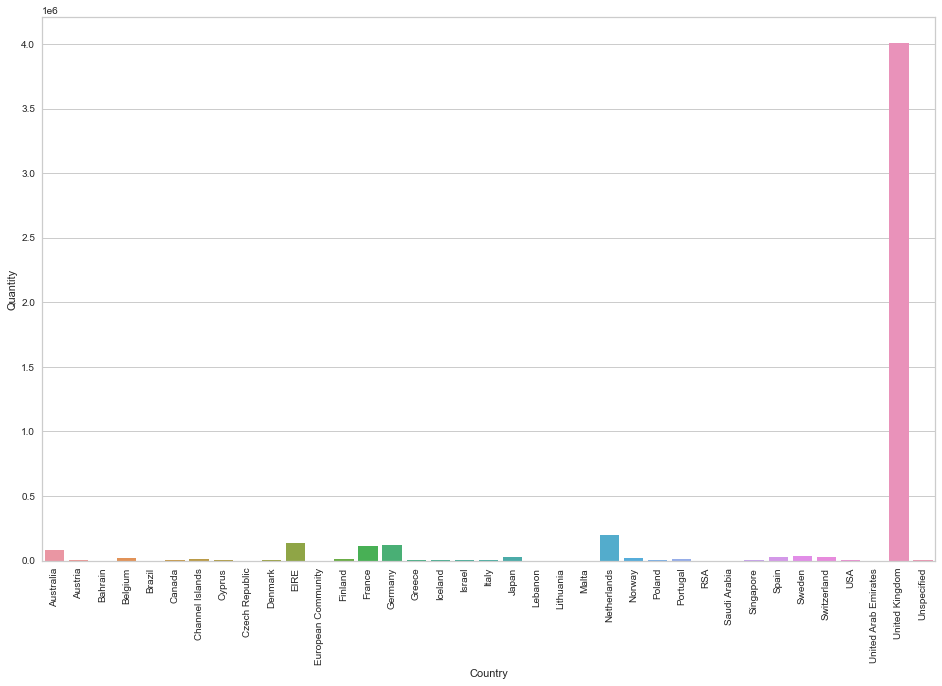

In [57]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.xticks(rotation=90)
sns.barplot(x="Country", y="Quantity", data=temp1)


Observation:
    Most of the Data Belong to only one Country i.e, United Kingdom
    
conclusion:
    It will have very less impact on prediction, so we are going to drop it.

In [58]:
df.drop(['Country'], axis=1, inplace=True)

In [59]:
df

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
406824  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
406825  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
406826  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
406827  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
406828  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID  
0              6   12/1/2010 8:26       2.55     17850.0  
1              6   12/1/2010 8:26       3.39     17850.0  
2              8   12/1/2010 8:26       2.75     17850.0  
3              6   12/1/2010 8:26       3.39     17850.0  
4              6   12/1/2010 8:26       3.39     17850.0  
...          ...              ...        ...         ...  
406824        12  12/9/2011 12:50       0.85     12680.0  
406825         6  12/9/2011 12:50       2.10     12680.0  
406826         4  12/9/2011 12:50       4.15     12680.0  
406827         4  12/9/2011 12:50       4.15     12680.0  
406828         3  12/9/2011 12:50       4.95     12680.0  

[406829 rows x 8 columns]

### Data Preprocessing

lets make some Data Preprocessing

There are several trasaction are present in dataset which got cancelled and there InvoiceNo starts with prefix C......

In [60]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity      3684         22190       4372

In [61]:
df[df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True)]

index InvoiceNo StockCode                       Description  \
141        141   C536379         D                          Discount   
154        154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS   
235        235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE    
236        236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES    
237        237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES    
...        ...       ...       ...                               ...   
406377  540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL   
406461  541541   C581499         M                            Manual   
406635  541715   C581568     21258        VICTORIAN SEWING BOX LARGE   
406636  541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER   
406637  541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT   

        Quantity      InvoiceDate  UnitPrice  CustomerID  
141           -1   12/1/2010 9:41      27.50     14527.0  
154           -1   12/1/2010 9:49       4.65     15311.0  
235          -12  12/1/2010 10:24       1.65     17548.0  
236          -24  12/1/2010 10:24       0.29     17548.0  
237          -24  12/1/2010 10:24       0.29     17548.0  
...          ...              ...        ...         ...  
406377       -11   12/9/2011 9:57       0.83     14397.0  
406461        -1  12/9/2011 10:28     224.69     15498.0  
406635        -5  12/9/2011 11:57      10.95     15311.0  
406636        -1  12/9/2011 11:58       1.25     17315.0  
406637        -5  12/9/2011 11:58       1.25     17315.0  

[8905 rows x 8 columns]

lets found find out How many order placed by each customer in each Trasaction

In [62]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
temp1 = temp.rename(columns = {'InvoiceDate':'Number of products'})
temp1[:10].sort_values('CustomerID')

CustomerID InvoiceNo  Number of products
0     12346.0    541431                   1
1     12346.0   C541433                   1
2     12347.0    537626                  31
3     12347.0    542237                  29
4     12347.0    549222                  24
5     12347.0    556201                  18
6     12347.0    562032                  22
7     12347.0    573511                  47
8     12347.0    581180                  11
9     12348.0    539318                  17

In [63]:
temp1.shape

(22190, 3)

First of all, I count the number of transactions corresponding to canceled orders:
Since we know, Cancelled Order Invoice number Starts with Prefix C

In [64]:
temp1['order_canceled'] = temp1['InvoiceNo'].apply(lambda x:int('C' in x))
display(temp1[:5])

n1 = temp1['order_canceled'].sum()
n2 = temp1.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

CustomerID InvoiceNo  Number of products  order_canceled
0     12346.0    541431                   1               0
1     12346.0   C541433                   1               1
2     12347.0    537626                  31               0
3     12347.0    542237                  29               0
4     12347.0    549222                  24               0

Number of orders canceled: 3654/22190 (16.47%) 


Observation:
We note that the number of cancellations is quite large ( ∼ 16% of the total number of transactions).

In [65]:
temp1.sort_values('CustomerID')[:5]

CustomerID InvoiceNo  Number of products  order_canceled
0     12346.0    541431                   1               0
1     12346.0   C541433                   1               1
2     12347.0    537626                  31               0
3     12347.0    542237                  29               0
4     12347.0    549222                  24               0

We can assume here is, we will have another transactions in the dataframe, mostly identical except for the Quantity and InvoiceDate variables in case if customer cancelled the order  by any reason, we are also having cancelled order and negative quantity where person got discount that we are not considering here.

At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled.

Below, I make a census of the cancel orders and check for the existence of counterparts:

In [66]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  tqdm(df.iterrows()):
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break            

406829it [08:21, 810.76it/s] 


In the above function, I checked the two cases:

1.a cancel order exists without counterpart

2.there's at least one counterpart with the exact same quantity

The index of the corresponding cancel order are respectively kept in the doubtfull_entry and entry_to_remove lists whose sizes are:

In [67]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6168
doubtfull_entry: 2616


Among these entries, the lines listed in the doubtfull_entry list correspond to the entries indicating a cancellation but for which there is no command beforehand. In practice, I decide to delete all of these entries

Now I check the number of entries that correspond to cancellations and that have not been deleted with the previous filter:

In [68]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 44


index InvoiceNo StockCode                      Description  Quantity  \
17807  27329   C538530     22630             DOLLY GIRL LUNCH BOX       -33   
22428  32870   C539195     22942      CHRISTMAS LIGHTS 10 SANTAS         -5   
22621  33085   C539221     22941     CHRISTMAS LIGHTS 10 REINDEER       -12   
22622  33086   C539221     22942      CHRISTMAS LIGHTS 10 SANTAS        -10   
36588  58496   C541245    85036C  ROSE 1 WICK MORRIS BOXED CANDLE       -12   

            InvoiceDate  UnitPrice  CustomerID  QuantityCanceled  
17807  12/13/2010 10:26       1.95     14796.0                 0  
22428  12/16/2010 12:05       8.50     12748.0                 0  
22621  12/16/2010 12:56       8.50     14911.0                 0  
22622  12/16/2010 12:56       8.50     14911.0                 0  
36588   1/16/2011 12:40       4.25     15535.0                 0

In [69]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [70]:
df_cleaned[df_cleaned['Quantity']<0]

index InvoiceNo StockCode Description  Quantity       InvoiceDate  \
141        141   C536379         D    Discount        -1    12/1/2010 9:41   
6748      9038   C537164         D    Discount        -1   12/5/2010 13:21   
10234    14498   C537597         D    Discount        -1   12/7/2010 12:34   
12760    19392   C537857         D    Discount        -1   12/8/2010 16:00   
20712    31134   C538897         D    Discount        -1   12/15/2010 9:14   
...        ...       ...       ...         ...       ...               ...   
361537  479868   C577227         D    Discount        -1  11/18/2011 12:06   
361538  479869   C577227         D    Discount        -1  11/18/2011 12:06   
372543  493613   C578239         D    Discount        -1  11/23/2011 12:29   
389005  516221   C579884         D    Discount        -1  11/30/2011 17:34   
389238  516455   C579908         D    Discount        -1    12/1/2011 8:49   

        UnitPrice  CustomerID  QuantityCanceled  
141         27.50     14527.0                 0  
6748        29.29     14527.0                 0  
10234      281.00     15498.0                 0  
12760      267.12     17340.0                 0  
20712        5.76     16422.0                 0  
...           ...         ...               ...  
361537      19.82     14527.0                 0  
361538      16.76     14527.0                 0  
372543      26.33     14912.0                 0  
389005      20.53     14527.0                 0  
389238      28.68     14527.0                 0  

[77 rows x 9 columns]

Observation:

Now we have only Negative Quantities in our Preprocessed Dataset where customer got Discount.

### Feature Engineering

In [71]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

In [72]:
df_cleaned[df_cleaned['TotalPrice']<0]

index InvoiceNo StockCode                          Description  \
99          99    536378     84991          60 TEATIME FAIRY CAKE CASES   
141        141   C536379         D                             Discount   
4041      5246    536851     21428  SET3 BOOK BOX GREEN GINGHAM FLOWER    
6748      9038   C537164         D                             Discount   
10234    14498   C537597         D                             Discount   
...        ...       ...       ...                                  ...   
367249  486386    577729     21212      PACK OF 72 RETROSPOT CAKE CASES   
372543  493613   C578239         D                             Discount   
389005  516221   C579884         D                             Discount   
389238  516455   C579908         D                             Discount   
394319  523074    580501     84946         ANTIQUE SILVER T-LIGHT GLASS   

        Quantity       InvoiceDate  UnitPrice  CustomerID  QuantityCanceled  \
99            24    12/1/2010 9:37       0.55     14688.0                27   
141           -1    12/1/2010 9:41      27.50     14527.0                 0   
4041           8    12/3/2010 9:49       4.25     12967.0                25   
6748          -1   12/5/2010 13:21      29.29     14527.0                 0   
10234         -1   12/7/2010 12:34     281.00     15498.0                 0   
...          ...               ...        ...         ...               ...   
367249        24  11/21/2011 12:53       0.55     15179.0                30   
372543        -1  11/23/2011 12:29      26.33     14912.0                 0   
389005        -1  11/30/2011 17:34      20.53     14527.0                 0   
389238        -1    12/1/2011 8:49      28.68     14527.0                 0   
394319         4   12/4/2011 13:00       1.25     14546.0                12   

        TotalPrice  
99           -1.65  
141         -27.50  
4041        -72.25  
6748        -29.29  
10234      -281.00  
...            ...  
367249       -3.30  
372543      -26.33  
389005      -20.53  
389238      -28.68  
394319      -10.00  

[130 rows x 10 columns]

We can't have more quantities canceled than bought initially. I'm deleting these lines.


In [73]:
df_cleaned.drop(df_cleaned[df_cleaned['TotalPrice']<0].index, axis = 0, inplace = True)

In [74]:
df_cleaned

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
406824  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
406825  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
406826  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
406827  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
406828  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID  QuantityCanceled  \
0              6   12/1/2010 8:26       2.55     17850.0                 0   
1              6   12/1/2010 8:26       3.39     17850.0                 0   
2              8   12/1/2010 8:26       2.75     17850.0                 0   
3              6   12/1/2010 8:26       3.39     17850.0                 0   
4              6   12/1/2010 8:26       3.39     17850.0                 0   
...          ...              ...        ...         ...               ...   
406824        12  12/9/2011 12:50       0.85     12680.0                 0   
406825         6  12/9/2011 12:50       2.10     12680.0                 0   
406826         4  12/9/2011 12:50       4.15     12680.0                 0   
406827         4  12/9/2011 12:50       4.15     12680.0                 0   
406828         3  12/9/2011 12:50       4.95     12680.0                 0   

        TotalPrice  
0            15.30  
1            20.34  
2            22.00  
3            20.34  
4            20.34  
...            ...  
406824       10.20  
406825       12.60  
406826       16.60  
406827       16.60  
406828       14.85  

[397871 rows x 10 columns]

### Extract Recency, Frequency, Monetary (RFM) Metrics

Recency: Number of days since a customer's last purchase

Frequency: Number of purchases by the customer
    
Monetary(Total Price): Total amount of money spent by the customer on his purchases

In [75]:
customer_wise_total_purchase_value_df = df_cleaned[['CustomerID', 'TotalPrice']].groupby('CustomerID', as_index = False).sum()
customer_wise_total_purchase_value_df.rename(columns = {'TotalPurchaseValue' : 'Monetary'}, inplace = True)
customer_wise_total_purchase_value_df

CustomerID  TotalPrice
0        12346.0        0.00
1        12347.0     4310.00
2        12348.0     1797.24
3        12349.0     1757.55
4        12350.0      334.40
...          ...         ...
4334     18280.0      180.60
4335     18281.0       80.82
4336     18282.0      176.60
4337     18283.0     2094.88
4338     18287.0     1837.28

[4339 rows x 2 columns]

In [76]:
customer_wise_frequent_purchases_df =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
customer_wise_frequent_purchases_df.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
customer_wise_frequent_purchases_df

CustomerID  Frequency
0        12346.0          2
1        12347.0        182
2        12348.0         31
3        12349.0         73
4        12350.0         17
...          ...        ...
4367     18280.0         10
4368     18281.0          7
4369     18282.0         13
4370     18283.0        756
4371     18287.0         70

[4372 rows x 2 columns]

In [77]:
merged_df = customer_wise_total_purchase_value_df.merge(customer_wise_frequent_purchases_df, on = "CustomerID", how = "inner")
merged_df

CustomerID  TotalPrice  Frequency
0        12346.0        0.00          2
1        12347.0     4310.00        182
2        12348.0     1797.24         31
3        12349.0     1757.55         73
4        12350.0      334.40         17
...          ...         ...        ...
4334     18280.0      180.60         10
4335     18281.0       80.82          7
4336     18282.0      176.60         13
4337     18283.0     2094.88        756
4338     18287.0     1837.28         70

[4339 rows x 3 columns]

In [97]:
last_purchase_df = df_cleaned[['CustomerID', 'InvoiceDate']].groupby('CustomerID', as_index = False).max()
last_purchase_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate'}, inplace = True)
last_purchase_df

CustomerID    LastPurchaseDate
0        12346.0 2011-01-18 10:01:00
1        12347.0 2011-12-07 15:52:00
2        12348.0 2011-09-25 13:13:00
3        12349.0 2011-11-21 09:51:00
4        12350.0 2011-02-02 16:01:00
...          ...                 ...
4334     18280.0 2011-03-07 09:52:00
4335     18281.0 2011-06-12 10:53:00
4336     18282.0 2011-12-02 11:43:00
4337     18283.0 2011-12-06 12:02:00
4338     18287.0 2011-10-28 09:29:00

[4339 rows x 2 columns]

In [98]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

Number of Days Since last Purchase

In [99]:
days_since_last_purchase = df_cleaned['InvoiceDate'].max() - last_purchase_df['LastPurchaseDate'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336     8 days 01:07:00
4337     4 days 00:48:00
4338    43 days 03:21:00
Name: LastPurchaseDate, Length: 4339, dtype: timedelta64[ns]

In [100]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase], index = merged_df.index)
time_diff_in_days

0       326
1         2
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336      8
4337      4
4338     43
Length: 4339, dtype: int64

In [101]:
merged_df['Recency'] = time_diff_in_days
merged_df['LastPurchaseDate'] = last_purchase_df['LastPurchaseDate'].tolist()
merged_df

CustomerID  TotalPrice  Frequency  Recency    LastPurchaseDate
0        12346.0        0.00          2      326 2011-01-18 10:01:00
1        12347.0     4310.00        182        2 2011-12-07 15:52:00
2        12348.0     1797.24         31       75 2011-09-25 13:13:00
3        12349.0     1757.55         73       19 2011-11-21 09:51:00
4        12350.0      334.40         17      310 2011-02-02 16:01:00
...          ...         ...        ...      ...                 ...
4334     18280.0      180.60         10      278 2011-03-07 09:52:00
4335     18281.0       80.82          7      181 2011-06-12 10:53:00
4336     18282.0      176.60         13        8 2011-12-02 11:43:00
4337     18283.0     2094.88        756        4 2011-12-06 12:02:00
4338     18287.0     1837.28         70       43 2011-10-28 09:29:00

[4339 rows x 5 columns]

In order to have a global view of the type of order performed in this dataset, I determine how the purchases are divided according to total prizes within Customers:

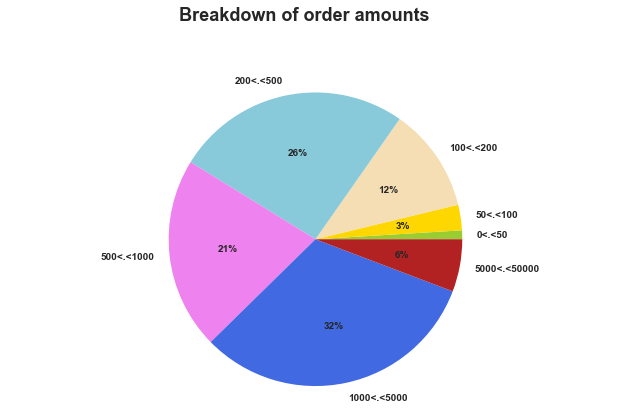

In [102]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = merged_df[(merged_df['TotalPrice'] < price) &
                       (merged_df['TotalPrice'] > price_range[i-1])]['TotalPrice'].count()
    count_price.append(val)

# Representation of the number of purchases / amount

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Breakdown of order amounts", ha='center', fontsize = 18);

In [103]:
merged_df

CustomerID  TotalPrice  Frequency  Recency    LastPurchaseDate
0        12346.0        0.00          2      326 2011-01-18 10:01:00
1        12347.0     4310.00        182        2 2011-12-07 15:52:00
2        12348.0     1797.24         31       75 2011-09-25 13:13:00
3        12349.0     1757.55         73       19 2011-11-21 09:51:00
4        12350.0      334.40         17      310 2011-02-02 16:01:00
...          ...         ...        ...      ...                 ...
4334     18280.0      180.60         10      278 2011-03-07 09:52:00
4335     18281.0       80.82          7      181 2011-06-12 10:53:00
4336     18282.0      176.60         13        8 2011-12-02 11:43:00
4337     18283.0     2094.88        756        4 2011-12-06 12:02:00
4338     18287.0     1837.28         70       43 2011-10-28 09:29:00

[4339 rows x 5 columns]

### Creation of customers categories

### Clustering

In [104]:
list_cols = ['TotalPrice','Frequency', "Recency"]

In [105]:
selected_customers = merged_df.copy(deep = True)

In [106]:

selected_customers = selected_customers[list_cols]
selected_customers


TotalPrice  Frequency  Recency
0           0.00          2      326
1        4310.00        182        2
2        1797.24         31       75
3        1757.55         73       19
4         334.40         17      310
...          ...        ...      ...
4334      180.60         10      278
4335       80.82          7      181
4336      176.60         13        8
4337     2094.88        756        4
4338     1837.28         70       43

[4339 rows x 3 columns]

Create histograms and box plots for RFM features to evaluate the data distribution within each features.

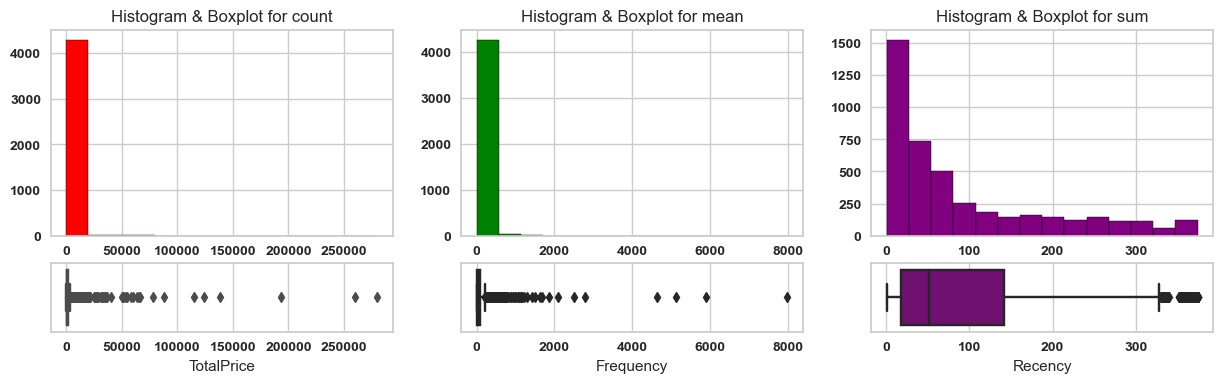

In [107]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Total Price (Monesty)
axis[0, 0].hist(selected_customers['TotalPrice'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'TotalPrice', data = selected_customers,  color = 'red', ax = axis[1, 0])
axis[0, 0].set_title("Histogram & Boxplot for count")

# Frequency
axis[0, 1].hist(selected_customers['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = selected_customers,  color = 'green', ax = axis[1, 1])
axis[0, 1].set_title("Histogram & Boxplot for mean")

# Recency
axis[0, 2].hist(selected_customers['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = selected_customers,  color = 'purple', ax = axis[1, 2])
axis[0, 2].set_title("Histogram & Boxplot for sum")

plt.show()



Total Price and Frequency columns contain highly skewed values which indicates possibility of outliers.

Treating likely outliers in the Total Price column with the inter-quartile range (IQR) metric.

In [108]:
def treating_outliers(df, col):
    col_q1 = df[col].quantile(0.25)
    col_q3 = df[col].quantile(0.75)
    col_iqr = col_q3 - col_q1
    new_df = df[(df[col] >= col_q1 - 1.5 * col_iqr) & (df[col] <= col_q3 + 1.5 * col_iqr)]
    return new_df

# new_df = treating_outliers(selected_customers, 'count')
# new_df = treating_outliers(selected_customers, 'mean')
new_df = treating_outliers(selected_customers, 'TotalPrice')
new_df = new_df.reset_index(drop = True)
new_df

TotalPrice  Frequency  Recency
0           0.00          2      326
1        1797.24         31       75
2        1757.55         73       19
3         334.40         17      310
4        2385.71         95       36
...          ...        ...      ...
3912      180.60         10      278
3913       80.82          7      181
3914      176.60         13        8
3915     2094.88        756        4
3916     1837.28         70       43

[3917 rows x 3 columns]

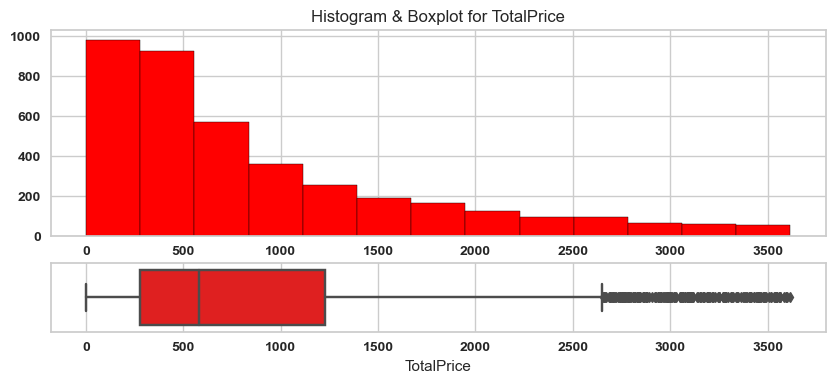

In [109]:
fig, axis_mon = plt.subplots(nrows = 2, ncols = 1, 
                         figsize = (10, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis_mon[0].hist(new_df['TotalPrice'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'TotalPrice', data = new_df,  color = 'red', ax = axis_mon[1])
axis_mon[0].set_title("Histogram & Boxplot for TotalPrice")

plt.show()

### Feature Scaling

In [110]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(new_df)
standard_df = pd.DataFrame(standard_df, columns = list_cols)

In [111]:
standard_df

TotalPrice  Frequency   Recency
0      -1.070991  -0.782326  2.224309
1       1.135251  -0.406800 -0.245580
2       1.086529   0.137066 -0.796631
3      -0.660491  -0.588088  2.066865
4       1.857641   0.421947 -0.629348
...          ...        ...       ...
3912   -0.849292  -0.678732  1.751979
3913   -0.971779  -0.717580  0.797480
3914   -0.854202  -0.639885 -0.904873
3915    1.500626   8.981349 -0.944234
3916    1.184403   0.098218 -0.560467

[3917 rows x 3 columns]

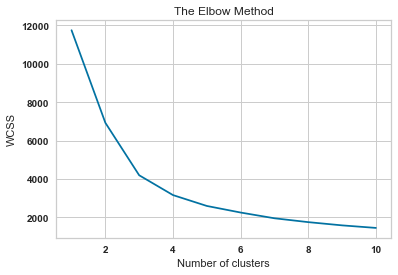

In [112]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(standard_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Observation:
    After plotting elbow plot, plot suggesting to go with 3 clusters, but before actually implementing the clusters first lets make some cluster Validation using Silhoutte Score

#### Cluster Validation

In [113]:
X = standard_df.to_numpy()

In [114]:
X

array([[-1.07099131, -0.78232562,  2.22430858],
       [ 1.13525133, -0.40679967, -0.24558031],
       [ 1.08652897,  0.1370655 , -0.79663122],
       ...,
       [-0.85420198, -0.63988474, -0.90487336],
       [ 1.50062605,  8.98134909, -0.94423414],
       [ 1.18440334,  0.09821799, -0.56046655]])

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4600948774831479
For n_clusters = 3 The average silhouette_score is : 0.4650492442503466
For n_clusters = 4 The average silhouette_score is : 0.46727152802866684
For n_clusters = 5 The average silhouette_score is : 0.4078635386646426
For n_clusters = 6 The average silhouette_score is : 0.3728307707223685
For n_clusters = 7 The average silhouette_score is : 0.3827338141836297
For n_clusters = 8 The average silhouette_score is : 0.35199115282292476
For n_clusters = 9 The average silhouette_score is : 0.35088618746733746
For n_clusters = 10 The average silhouette_score is : 0.3611336655535437
For n_clusters = 11 The average silhouette_score is : 0.3693301183163974
For n_clusters = 12 The average silhouette_score is : 0.3513777396910553
For n_clusters = 13 The average silhouette_score is : 0.30992200245054835
For n_clusters = 14 The average silhouette_score is : 0.2988540

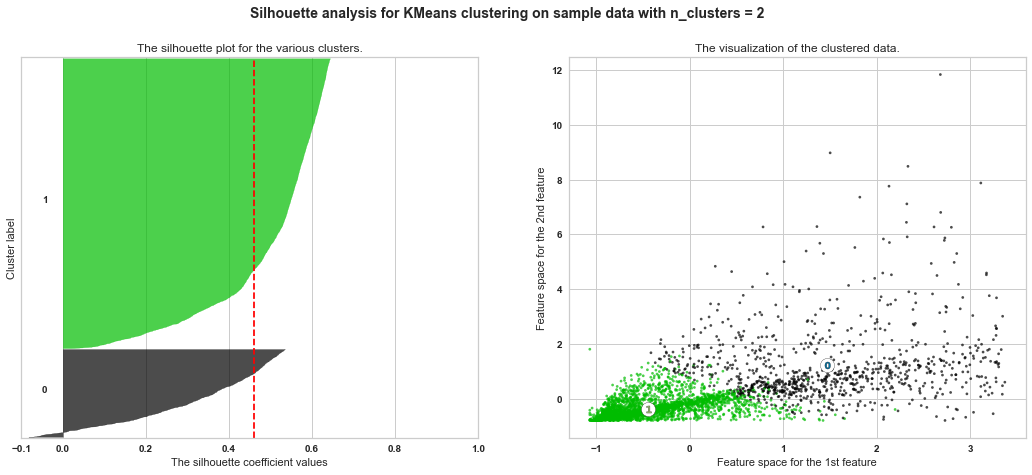

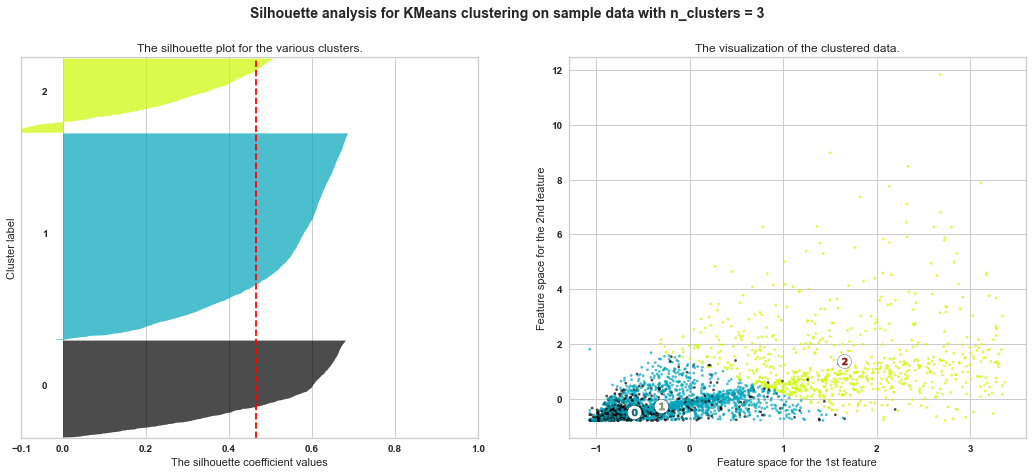

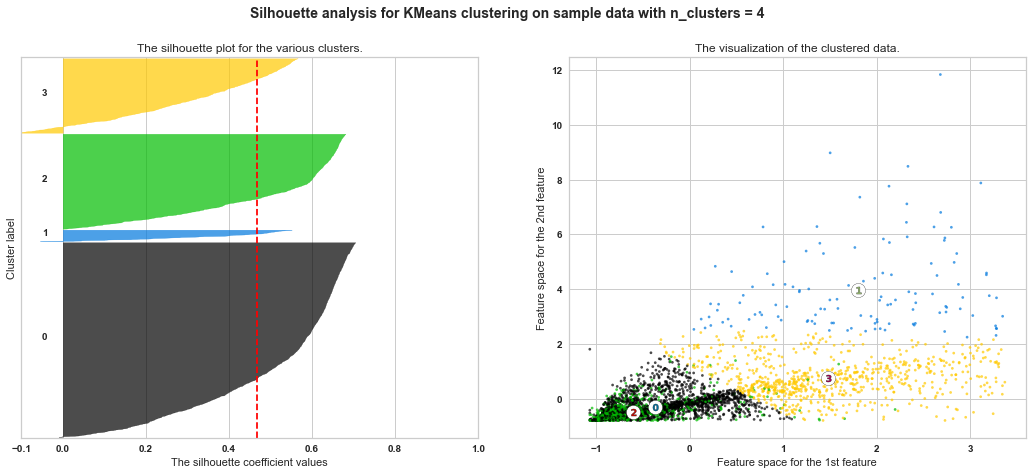

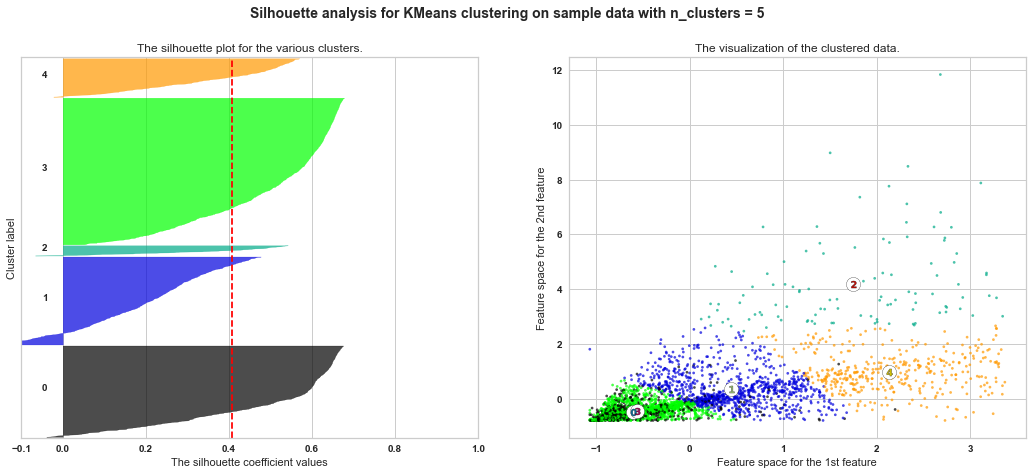

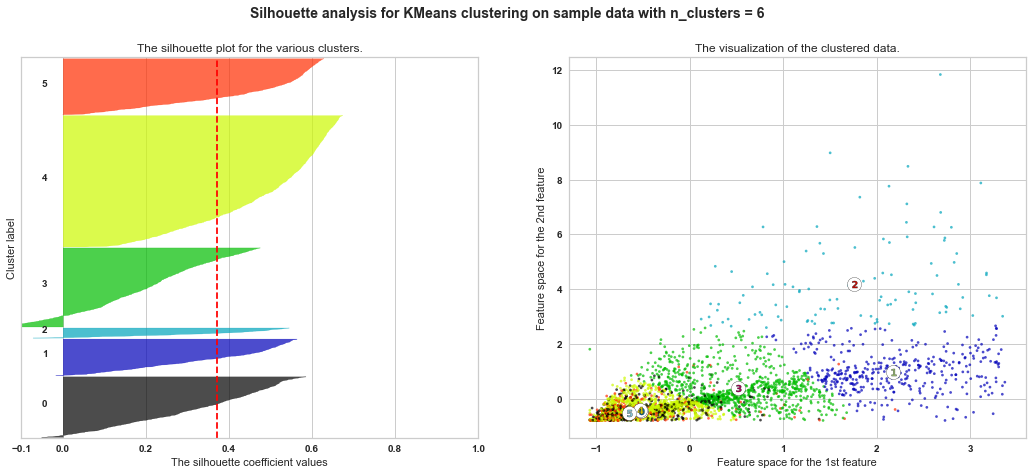

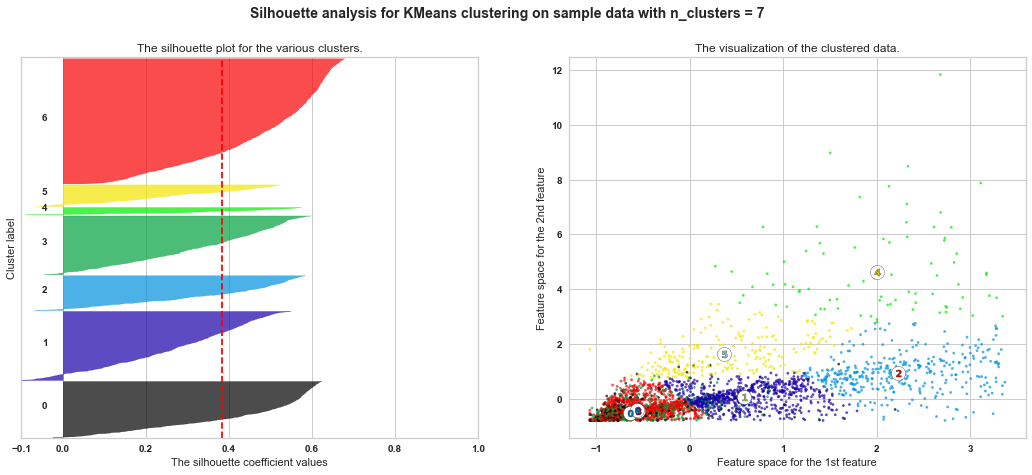

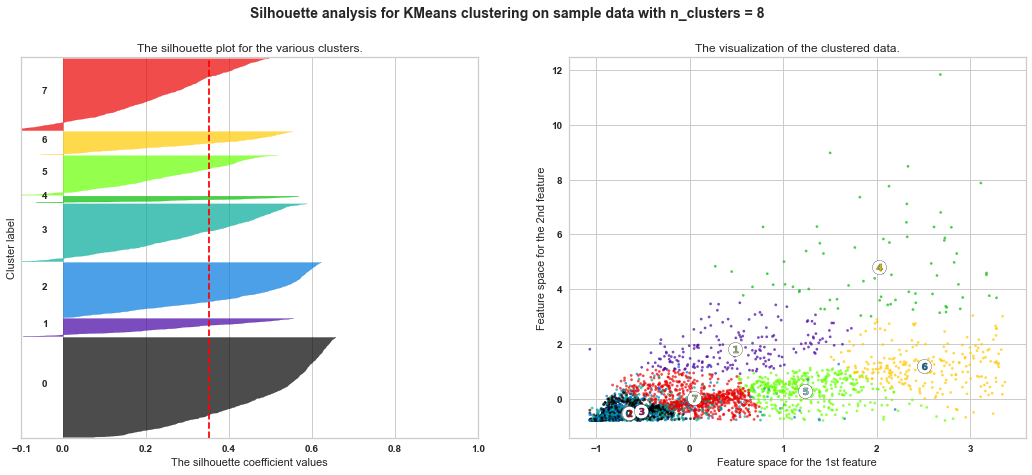

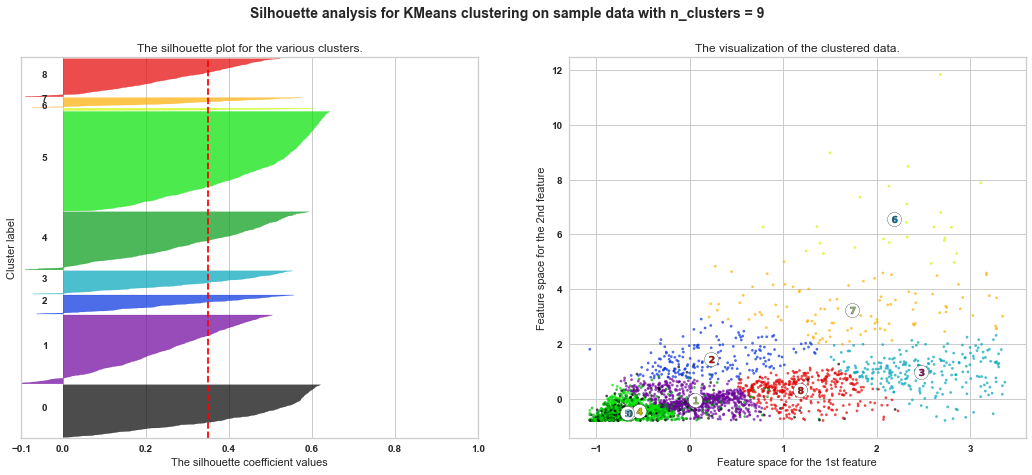

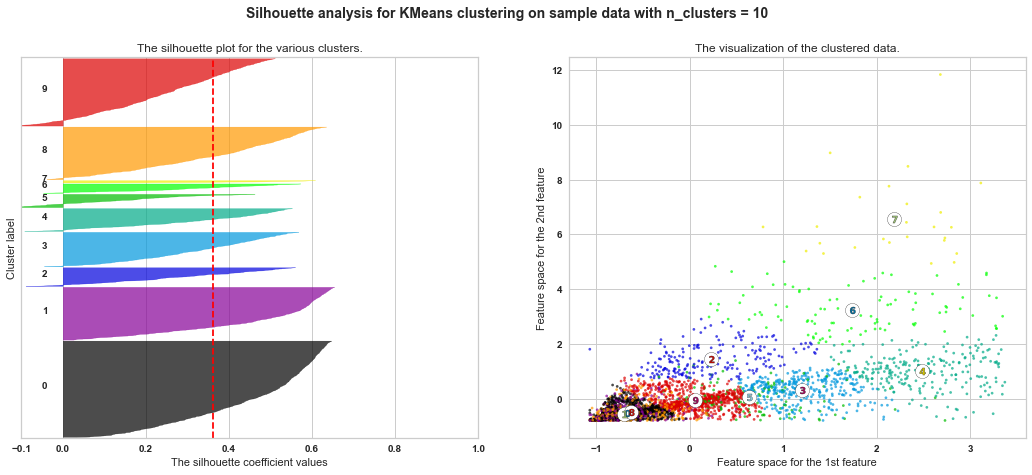

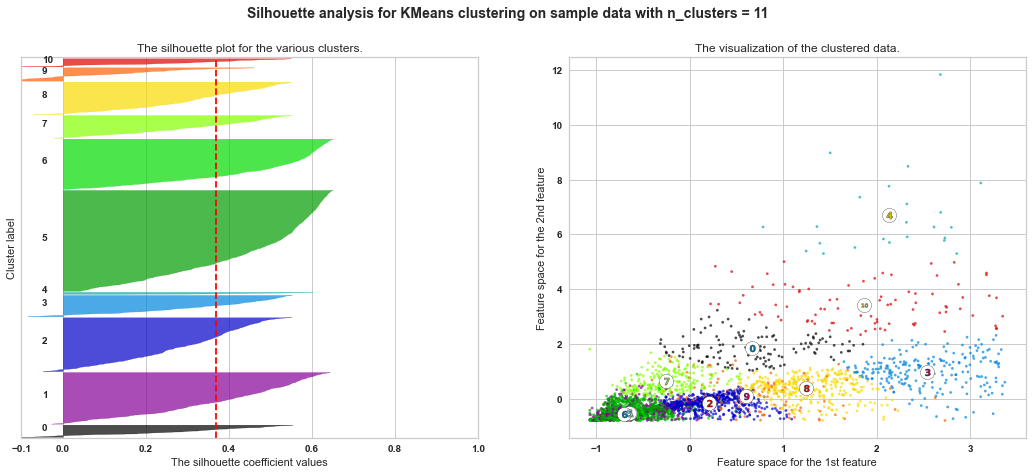

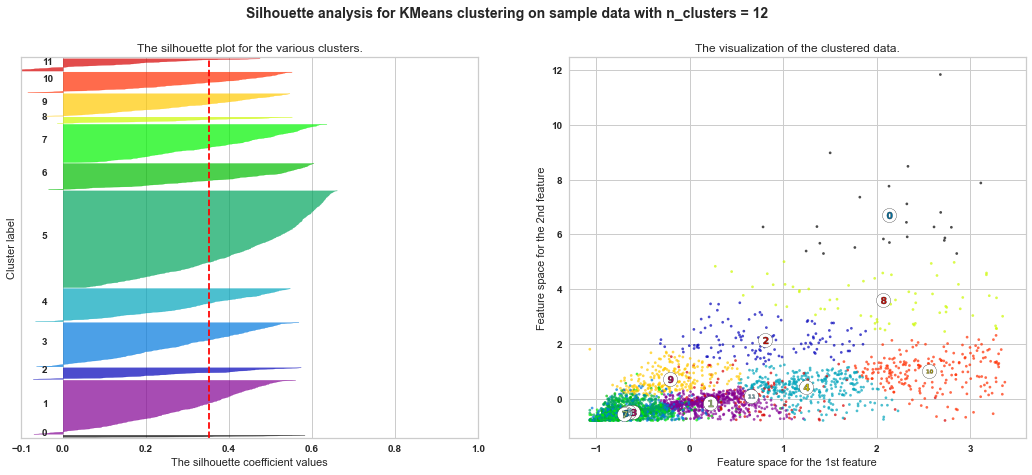

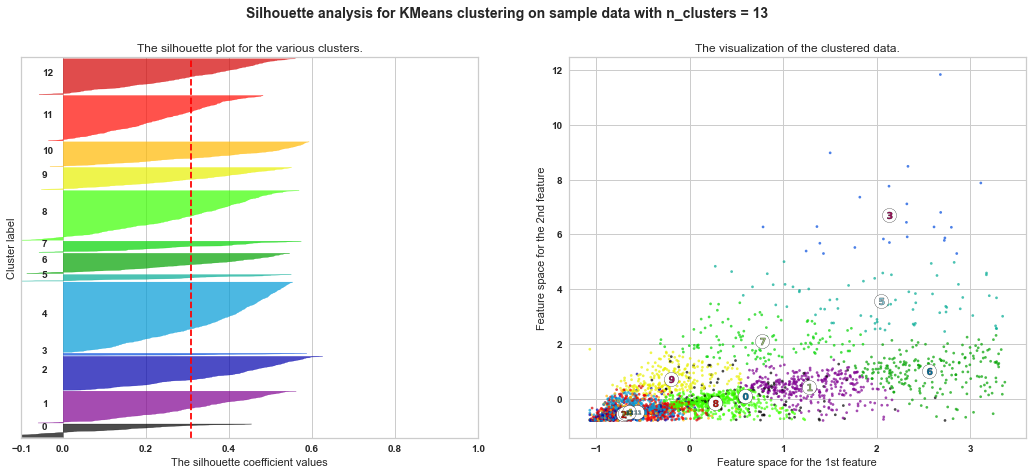

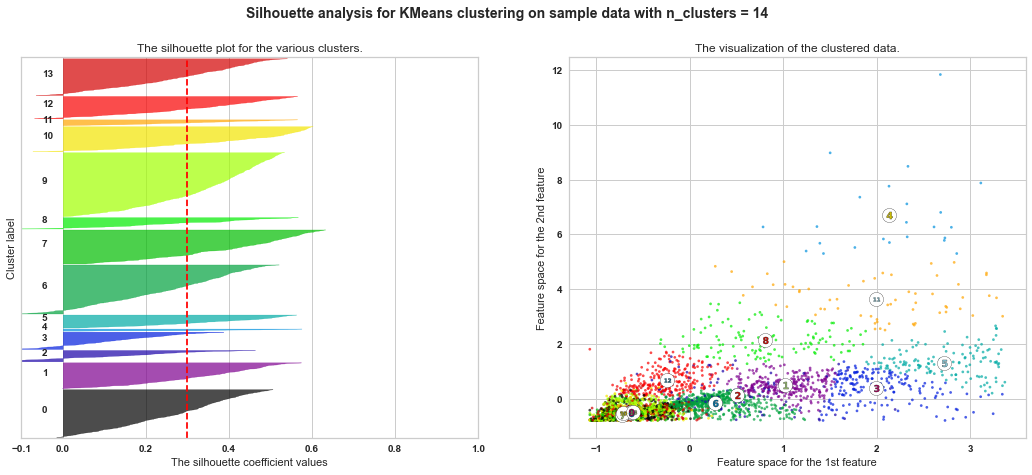

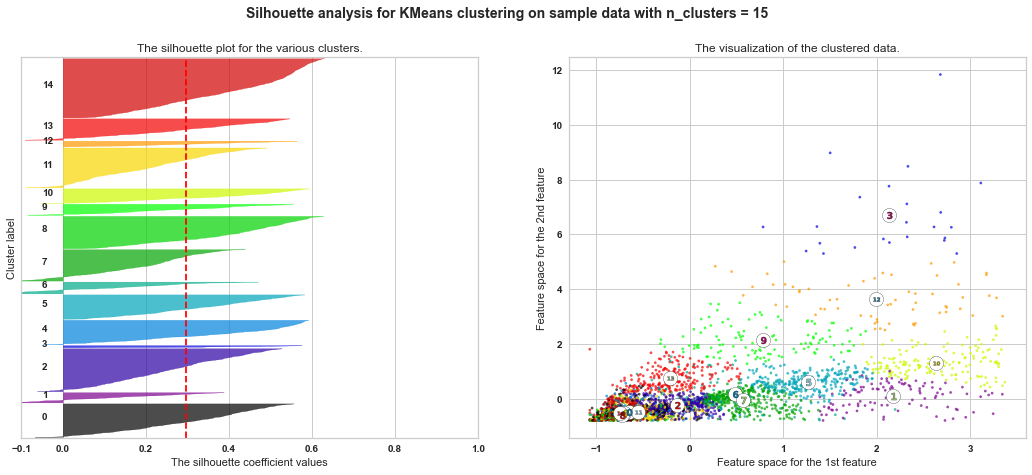

In [115]:
#Note - Below code is copied from Sklearn Silhouette Score Official API Documentation

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Observation:

1) We are getting Highest Silhouette Score for Cluster Number 4.

2) From Silhouette Plot, In cluster Number 4 Every Cluster has greater value than mean value.

3) There are very less negative graph present in cluster number 4.

Conclusion:

Cluster Number 4 is the best among all.

In [116]:
kmeans_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_model.fit(standard_df)

cluster_labels = pd.Series(data = kmeans_model.labels_, index = standard_df.index)
cluster_labels.value_counts()

1    2034
2     991
0     774
3     118
dtype: int64

In [117]:
km_df = pd.concat([new_df, cluster_labels], axis = 1)
km_df.columns = list(new_df.columns) + ['ClusterLabel']
km_df

TotalPrice  Frequency  Recency  ClusterLabel
0           0.00          2      326             2
1        1797.24         31       75             0
2        1757.55         73       19             0
3         334.40         17      310             2
4        2385.71         95       36             0
...          ...        ...      ...           ...
3912      180.60         10      278             2
3913       80.82          7      181             2
3914      176.60         13        8             1
3915     2094.88        756        4             3
3916     1837.28         70       43             0

[3917 rows x 4 columns]

In [118]:
plotly_fig = px.scatter_3d(km_df, x = 'TotalPrice', y = 'Frequency', z = 'Recency', color = 'ClusterLabel')
plotly_fig.show()

Clustering of Data is Done

### Visualization of Clusters

In [119]:
TotalExpenditure = km_df.groupby(['ClusterLabel']).agg({'TotalPrice': "mean"}).reset_index()
TotalExpenditure

ClusterLabel   TotalPrice
0             0  2076.538528
1             1   570.531422
2             2   375.498103
3             3  2352.136864

In [120]:
import plotly.express as px
fig = px.bar(TotalExpenditure, x='ClusterLabel', y='TotalPrice', color = 'ClusterLabel', title='Average Money spent by Customer of Each Cluster')
fig.show()

Observation:
    
Customer Belongs to Cluster 3, on an average spents more money and any other customers.

In [121]:
AvgFrequency = km_df.groupby(['ClusterLabel']).agg({'Frequency': "mean"}).reset_index()
AvgFrequency

ClusterLabel   Frequency
0             0  122.621447
1             1   40.058997
2             2   24.249243
3             3  373.389831

In [122]:
import plotly.express as px
fig = px.bar(AvgFrequency, x='ClusterLabel', y='Frequency', color = 'ClusterLabel', title='Avg. Frequency of Buying items' )
fig.show()

Observation:
    
On an average Customers of cluster 3 purchase quite frequently.

In [123]:
max_min = km_df.groupby(['ClusterLabel'])['TotalPrice'].agg({'max','min'}).reset_index()
max_min

ClusterLabel      max     min
0             0  3617.57  615.39
1             1  1759.50    0.00
2             2  2661.24    0.00
3             3  3598.26  970.88

In [124]:
fig = px.bar(max_min, x='ClusterLabel', y='max', color = 'ClusterLabel', title = "Highest Purchase made by people of each cluster")
fig.show()

In [125]:
fig = px.bar(max_min, x='ClusterLabel', y='min', color = 'ClusterLabel', title = "Lowest Purchase made by people of each cluster")
fig.show()

Observation:
    
Even If highest Purchase made by customer of Cluster 0 and Cluster 3 is almost same, but in terms of lowest Purchase range Cluster 3 beats cluster 0, it means that Customer of cluster 3 Spents more and generally buy costly products.


Conclusion:

So, Customer belongs to cluster 3 Spends more they often buys items as well than customer of any other cluster. 

## Modeling Part

In [126]:
data = km_df.copy(deep = True)
data

TotalPrice  Frequency  Recency  ClusterLabel
0           0.00          2      326             2
1        1797.24         31       75             0
2        1757.55         73       19             0
3         334.40         17      310             2
4        2385.71         95       36             0
...          ...        ...      ...           ...
3912      180.60         10      278             2
3913       80.82          7      181             2
3914      176.60         13        8             1
3915     2094.88        756        4             3
3916     1837.28         70       43             0

[3917 rows x 4 columns]

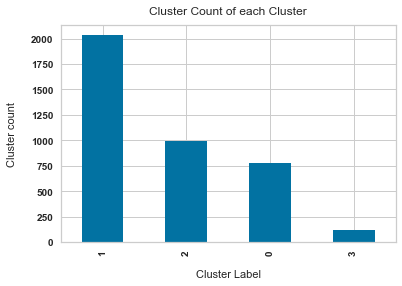

In [127]:
data['ClusterLabel'].value_counts().plot(kind='bar');
plt.xlabel("Cluster Label", labelpad=14)
plt.ylabel("Cluster count", labelpad=14)
plt.title("Cluster Count of each Cluster", y=1.02);

Observation:
    
Dataset is imbalanced to perform any Modeling, it can causes Overfitting

In [128]:
columns = ['TotalPrice', 'Frequency', 'Recency']

X = data[columns]
Y = data['ClusterLabel']


To overcome this problem i am using Oversampling using SMOTE

In [129]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Class=2, n=2034 (25.000%)
Class=0, n=2034 (25.000%)
Class=1, n=2034 (25.000%)
Class=3, n=2034 (25.000%)


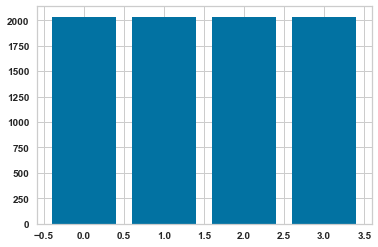

In [130]:
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Now every Cluster has equal data

In [131]:
scalar = preprocessing.StandardScaler()
X_scaled = scalar.fit_transform(X)

In [132]:
X_scaled

array([[-1.29398619, -0.90024371,  2.25592445],
       [ 0.43091291, -0.7093527 , -0.16157708],
       [ 0.39282047, -0.43288985, -0.70093997],
       ...,
       [ 0.53594095,  1.41019579, -0.84541217],
       [ 0.90625967,  1.62083415, -0.81651773],
       [ 1.70408012,  2.58187166, -0.69130849]])

In [133]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.30, random_state= 355)

### Random Forest Classifier

In [134]:
rand_clf = RandomForestClassifier(random_state=6)

In [135]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [136]:
print("Train Accuracy:",rand_clf.score(x_train, y_train))
print("Test Accuracy:",rand_clf.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9950839819746006


In [137]:
y_pred=rand_clf.predict(x_test)

In [138]:
Random_precision = precision_score(y_test, y_pred, average='micro')
Random_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Random_precision)
print('Recall: ',Random_recall)


Precision:  0.9950839819746006
Recall:  0.9950839819746006


In [139]:
Random_Cross = cross_val_score(rand_clf, X, Y, cv=10, scoring="accuracy").mean()
Random_Cross

0.99533063758156

### SVC

In [140]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [141]:
print("Train Accuracy:",svm.score(x_train, y_train))
print("Test Accuracy:",svm.score(x_test, y_test))

Train Accuracy: 0.9935030728709394
Test Accuracy: 0.988529291274068


In [142]:
y_pred=svm.predict(x_test)

In [143]:
svc_precision = precision_score(y_test, y_pred, average='micro')
svc_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',svc_precision)
print('Recall: ',svc_recall)


Precision:  0.988529291274068
Recall:  0.988529291274068


In [144]:
svc_cross = cross_val_score(svm, X, Y, cv=10, scoring="accuracy").mean()
svc_cross

0.9689047148456742

### KNN

In [145]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier()

In [146]:
y_pred=knn.predict(x_test)

In [147]:
print("Train Accuracy:",knn.score(x_train, y_train))
print("Test Accuracy:",knn.score(x_test, y_test))

Train Accuracy: 0.9966637401229148
Test Accuracy: 0.9918066366243343


In [148]:
Knn_precision = precision_score(y_test, y_pred, average='micro')
Knn_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Knn_precision)
print('Recall: ',Knn_recall)


Precision:  0.9918066366243343
Recall:  0.9918066366243343


In [149]:
knn_cross = cross_val_score(knn, X, Y, cv=10, scoring="accuracy").mean()
knn_cross

0.9875869999486238

### Naive Bayes

In [150]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [151]:
print("Train Accuracy:",model.score(x_train, y_train))
print("Test Accuracy:",model.score(x_test, y_test))

Train Accuracy: 0.9480245829675154
Test Accuracy: 0.9549365014338386


In [152]:
y_pred=model.predict(x_test)

In [153]:
Nb_precision = precision_score(y_test, y_pred, average='micro')
Nb_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Nb_precision)
print('Recall: ',Nb_recall)


Precision:  0.9549365014338386
Recall:  0.9549365014338386


In [154]:
Nb_Cross = cross_val_score(model, X, Y, cv=10, scoring="accuracy").mean()
Nb_Cross

0.9497304248226758

In [155]:
Model = {'Model_Name':['RandomForest', 'SVC', 'KNN', 'Naive Bayes'],
        'Precision':[Random_precision, svc_precision, Knn_precision, Nb_precision],
        "Recall":[Random_recall, svc_recall, Knn_recall, Nb_recall],
        "Cross_Validation":[Random_Cross, svc_cross,knn_cross,Nb_Cross]}

df = pd.DataFrame(Model)

In [156]:
df

Model_Name  Precision    Recall  Cross_Validation
0  RandomForest   0.995084  0.995084          0.995331
1           SVC   0.988529  0.988529          0.968905
2           KNN   0.991807  0.991807          0.987587
3   Naive Bayes   0.954937  0.954937          0.949730

In [157]:
fig = px.line(df, x='Model_Name', y='Precision', text="Precision", title='Precision Score for different model')
fig.show()

In [158]:
fig = px.line(df, x='Model_Name', y='Cross_Validation', text="Cross_Validation", title='Cross Validation Score for different model')
fig.show()

Observation:
    
Each model performed very well but we got High Precision and Validation Score on Random Forest Classifier.

    
